In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download ashirwadsangwan/imdb-dataset

 99% 1.42G/1.44G [00:12<00:00, 117MB/s]
100% 1.44G/1.44G [00:12<00:00, 125MB/s]


In [ ]:
import zipfile

path = 'imdb-dataset.zip'
zip_file = zipfile.ZipFile(path)
zip_list = zip_file.namelist()

for f in zip_list:
    zip_file.extract(f)

zip_file.close()

In [ ]:
!pip install pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

     |████████████████████████████████| 212.4 MB 61 kB/s 
     |████████████████████████████████| 198 kB 39.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=758d64acd67c5a0d0ee48878a50bed53b5c42c9112280a8fa2f51058c8acde06
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
spark = SparkSession.builder.enableHiveSupport().getOrCreate() 

In [ ]:
name_basics = spark.read.option("sep", "\t").csv('./name.basics.tsv/name.basics.tsv', header=True)
title_akas = spark.read.option("sep", "\t").csv('./title.akas.tsv/title.akas.tsv', header=True)
title_basics = spark.read.option("sep", "\t").csv('./title.basics.tsv/title.basics.tsv', header=True)
title_principals = spark.read.option("sep", "\t").csv('./title.principals.tsv/title.principals.tsv', header=True)
title_rating = spark.read.option("sep", "\t").csv('./title.ratings.tsv/title.ratings.tsv', header=True)

In [ ]:
print(name_basics.rdd.getNumPartitions())
print(title_akas.rdd.getNumPartitions())
print(title_basics.rdd.getNumPartitions())
print(title_principals.rdd.getNumPartitions())
print(title_rating.rdd.getNumPartitions())

5
8
5
13
2


In [ ]:
!lscpu 

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [ ]:
name_basics = name_basics.repartition(2)
title_akas = title_akas.repartition(2)
title_basics = title_basics.repartition(2)
title_principals = title_principals.repartition(2)
title_rating = title_rating.repartition(2)

In [ ]:
title_akas.show(5)

+---------+--------+--------------------+------+--------+-----------+----------+---------------+
|  titleId|ordering|               title|region|language|      types|attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+----------+---------------+
|tt0000001|       1|Carmencita - span...|    HU|      \N|imdbDisplay|        \N|              0|
|tt0000001|       2|          Καρμενσίτα|    GR|      \N|         \N|        \N|              0|
|tt0000001|       3|          Карменсита|    RU|      \N|         \N|        \N|              0|
|tt0000001|       4|          Carmencita|    US|      \N|         \N|        \N|              0|
|tt0000001|       5|          Carmencita|    \N|      \N|   original|        \N|              1|
+---------+--------+--------------------+------+--------+-----------+----------+---------------+
only showing top 5 rows



In [ ]:
title_basics.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            \N|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [ ]:
title_principals.show(5) 

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
+---------+--------+---------+---------------+--------------------+-----------+
only showing top 5 rows



In [ ]:
title_rating.show(5)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
+---------+-------------+--------+
only showing top 5 rows



In [ ]:
title_principals.count(), title_basics.count(), name_basics.count()

(36468817, 6321302, 9706922)

In [ ]:
title_akas.createOrReplaceTempView("title_akas")
title_basics.createOrReplaceTempView("title_basics")
title_principals.createOrReplaceTempView("title_principals")
title_rating.createOrReplaceTempView("title_ratings")
name_basics.createOrReplaceTempView("name_basics")

In [ ]:

query = """select tconst, nconst, job, category 
  from title_principals
  where (job like '%act%') or
  (category like '%act%') ;"""

correspondence_film_actor = spark.sql(query)
correspondence_film_actor.show(10)


query = """select count(nconst) as number_of_unique_correspondences
  from title_principals
  where   (category like '%act%') or
  (job like '%act%') ;"""

res = spark.sql(query)
res.show(1)


+---------+---------+---+--------+
|   tconst|   nconst|job|category|
+---------+---------+---+--------+
|tt0101343|nm0588679| \N|   actor|
|tt0366055|nm0005172| \N|   actor|
|tt0206490|nm0006893| \N|   actor|
|tt0443944|nm1822764| \N| actress|
|tt0105549|nm0389687| \N| actress|
|tt0048499|nm0597985| \N| actress|
|tt0104436|nm0675616| \N|   actor|
|tt0208293|nm0104770| \N|   actor|
|tt0203429|nm0691932| \N|   actor|
|tt0174577|nm0153862| \N| actress|
+---------+---------+---+--------+
only showing top 10 rows

+--------------------------------+
|number_of_unique_correspondences|
+--------------------------------+
|                        14849990|
+--------------------------------+



In [ ]:
query = """select  nconst, primaryname, primaryProfession 
  from name_basics
    where (primaryProfession like '%act%');"""

actors_names = spark.sql(query)
actors_names.show(10)


query = """select count(nconst) as number_of_actors
  from name_basics
    where (primaryProfession like '%act%');"""

res1 = spark.sql(query)
res1.show(1)


+---------+--------------+-----------------+
|   nconst|   primaryname|primaryProfession|
+---------+--------------+-----------------+
|nm0502084|   Dora Lennox|          actress|
|nm0265903|Pernille Falck|          actress|
|nm1157162|   Tommy Smite|            actor|
|nm0192526|Vincenzo Cuomo|            actor|
|nm0764438| Estrella Sanz|          actress|
|nm1031849| Anna Pantzeli|   actress,writer|
|nm0567640|  Amy McDonald|          actress|
|nm0098007|    Jim Bosley|            actor|
|nm0066843|   Fanny Behak|          actress|
|nm1000872|Saori Fujimoto|          actress|
+---------+--------------+-----------------+
only showing top 10 rows

+----------------+
|number_of_actors|
+----------------+
|         3624970|
+----------------+




A crew member can be "known for" a certain film for being a writer or soundtrack for example. It is not certainly known

In order to keep the analysis as accurate as possible, only the table title_principals will be used to create baskets. name_basics will be useful in order to grant a name to the actors identifiers at the end of the analysis


In [ ]:
# now we need to join correspondence_film_actor with actors_names, the analysis
# will be performed on the identifiers, names will be used to display final results

correspondence_film_actor.createOrReplaceTempView("correspondence_film_actor")

actors_names.createOrReplaceTempView("actors_names")


query = """select  L.tconst, L.nconst, R.primaryname 
  from correspondence_film_actor as L left join actors_names as R on L.nconst = R.nconst;"""

correspondence_with_names = spark.sql(query)
correspondence_with_names.show(10)

correspondence_with_names.createOrReplaceTempView("correspondence_with_names")


query = """select count(*) as number_of_actors
  FROM correspondence_with_names;"""

res1 = spark.sql(query)
res1.show(1)


+---------+---------+--------------+
|   tconst|   nconst|   primaryname|
+---------+---------+--------------+
|tt0056906|nm0000086|Louis de Funès|
|tt0058135|nm0000086|Louis de Funès|
|tt0050260|nm0000086|Louis de Funès|
|tt0052686|nm0000086|Louis de Funès|
|tt0060475|nm0000086|Louis de Funès|
|tt0074103|nm0000086|Louis de Funès|
|tt0063674|nm0000086|Louis de Funès|
|tt0046243|nm0000086|Louis de Funès|
|tt0083109|nm0000086|Louis de Funès|
|tt0335439|nm0000086|Louis de Funès|
+---------+---------+--------------+
only showing top 10 rows

+----------------+
|number_of_actors|
+----------------+
|        14849990|
+----------------+



+---------+-------------+
|   tconst|baskets_sizes|
+---------+-------------+
|tt0170678|            5|
|tt0345518|            5|
|tt0259816|           10|
|tt0230825|           10|
|tt0098390|            4|
+---------+-------------+
only showing top 5 rows

max value:  10.0
75% percentile:  5.0
50% percentile:  4.0
25% percentile:  2.0
min value:  1.0


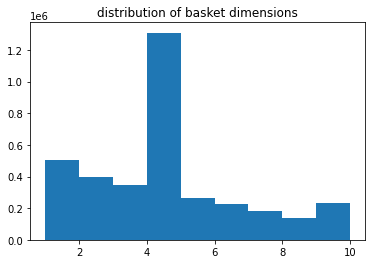

In [ ]:
# GET BASKETS DIMENSIONS - EACH FILM IS A BASKET AND THE ACTORS IN IT ARE THE ITEMS
import numpy as np
import pandas as pd


query = """select tconst, count(nconst) as baskets_sizes from correspondence_film_actor group by tconst;;"""

res = spark.sql(query)

res.show(5)

respandas = res.toPandas()


setsizes = respandas["baskets_sizes"].values

print("max value: ", np.percentile(setsizes,100))
print("75% percentile: ", np.percentile(setsizes,75))
print("50% percentile: ", np.percentile(setsizes,50))
print("25% percentile: ", np.percentile(setsizes,25))
print("min value: ", np.percentile(setsizes,0))

plt.title("distribution of basket dimensions")
plt.hist(setsizes, bins = 9)
plt.show()

In [ ]:
# create baskets

from pyspark.sql.functions import collect_set

baskets = correspondence_film_actor.groupBy('tconst').agg(collect_set('nconst').alias('items'))
baskets.createOrReplaceTempView('baskets')

baskets.show(10)

+---------+--------------------+
|   tconst|               items|
+---------+--------------------+
|tt0001170|[nm0161366, nm086...|
|tt0001664|[nm0616729, nm080...|
|tt0001732|[nm0532996, nm036...|
|tt0001887|         [nm0681933]|
|tt0002253|[nm0537556, nm052...|
|tt0002473|[nm0537556, nm036...|
|tt0002588|[nm0508592, nm003...|
|tt0002591|[nm0029806, nm050...|
|tt0002667|[nm0938059, nm016...|
|tt0003043|[nm0069327, nm092...|
+---------+--------------------+
only showing top 10 rows



In [ ]:
baskets.rdd.getNumPartitions()

200

In [ ]:
# USING PARTITIONS = 10
from pyspark.ml.fpm import FPGrowth
import time


start = time.time()


fpGrowth = FPGrowth(itemsCol="items", minSupport=0.00001, minConfidence=0, numPartitions = 10)
model = fpGrowth.fit(baskets)

finish = time.time()


print("The algorithm takes ", (finish - start)/60, " minutes to run ")

The algorithm takes  9.160376751422882  minutes to run 


In [ ]:
# USING PARTITIONS = 200


start = time.time()


fpGrowth = FPGrowth(itemsCol="items", minSupport=0.00001, minConfidence=0, numPartitions = 200)
model = fpGrowth.fit(baskets)

finish = time.time()


print("The algorithm takes ", (finish - start)/60, " minutes to run ")

The algorithm takes  4.597138500213623  minutes to run 


In [ ]:
# Display frequent itemsets.
mostPopularItemInABasket = model.freqItemsets
mostPopularItemInABasket.show(30),mostPopularItemInABasket.count()

+--------------------+----+
|               items|freq|
+--------------------+----+
|         [nm0834373]|  49|
|         [nm0584206]|  44|
|         [nm0561520]|  46|
|         [nm0687443]|  91|
|[nm0687443, nm000...|  37|
|[nm0687443, nm000...|  37|
|[nm0687443, nm036...|  37|
|         [nm0475331]|  62|
|         [nm0311071]|1801|
|         [nm0257821]| 133|
|         [nm1775306]| 168|
|         [nm0932565]|  81|
|[nm0932565, nm068...|  38|
|         [nm0478439]|  37|
|         [nm0230726]|  70|
|         [nm0904293]|  38|
|         [nm0302704]| 211|
|[nm0302704, nm020...|  51|
|         [nm1715437]| 236|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm257...| 234|
|[nm1715437, nm049...| 234|
|[nm1715437, nm116...| 234|
|[nm1715437, nm116...| 234|
+--------------------+----+
only showing top 30 rows



(None, 608253)

In [ ]:
# DISPLAY

import pyspark.sql.functions as F
from pyspark.sql.functions import col


frequent_itemsets_names = ( mostPopularItemInABasket.limit(50)
  .withColumn('id', F.monotonically_increasing_id())
  .select(col('id'), F.explode('items').alias('items'), col('freq'))
  .join(correspondence_with_names, col('nconst') == col('items'), 'inner')
  .select(col('id'), col('primaryname').alias('items'), col('freq'))
  .groupBy(col('id'), col('freq'))
  .agg(F.collect_set('items').alias('items'))
  .select(col('id'), col('items'), col('freq'))
  .sort(col('id').asc())
)

frequent_itemsets_names.show(50)


+---+--------------------+----+
| id|               items|freq|
+---+--------------------+----+
|  0|   [Gail Strickland]|  49|
|  1|[Sean Cameron Mic...|  44|
|  2|     [Louella Maxam]|  46|
|  3|     [Jack Plotnick]|  91|
|  4|[Jack Plotnick, A...|  37|
|  5|[Jess Harnell, Ja...|  37|
|  6|[Jess Harnell, Ja...|  37|
|  7|      [Nicolin Kunz]|  62|
|  8|      [Tibor Gazdag]|1801|
|  9|      [Bill Engvall]| 133|
| 10|      [Loren Chance]| 168|
| 11|      [Dave Willock]|  81|
| 12|[John Pickard, Da...|  38|
| 13|[Sebastian La Cause]|  37|
| 14|       [Tijn Docter]|  70|
| 15|      [Dragan Vujic]|  38|
| 16|      [Gina Gallego]| 211|
| 17|[Gina Gallego, La...|  51|
| 18|      [Da-hye Jeong]| 236|
| 19|[Da-hye Jeong, Se...| 234|
| 20|[Bo-Hee Lee, Da-h...| 234|
| 21|[Won-jong Lee, Da...| 234|
| 22|[Won-jong Lee, Bo...| 234|
| 23|[Hee-Jae Lee, Da-...| 234|
| 24|[Bo-Hee Lee, Hee-...| 234|
| 25|[Won-jong Lee, He...| 234|
| 26|[Won-jong Lee, Bo...| 234|
| 27|[Bo-Hee Lee, Da-h...| 234|
| 28|[Wo